# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).



## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


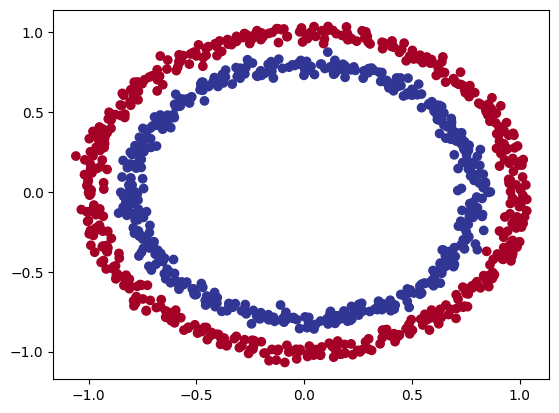

In [ ]:
# Vizualize, vizualize, vizualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to pracrtice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
 X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example f features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80& will be train
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # self.two_linear_layers = nn.Sequential(    # replicate code above with nn.Sequential() method. it's equivalent
    #     nn.Linear(in_features=2, out_features=5)   # NOTE: don't use it in your subclasses
    #     nn.Linear(in_features=5, out_features=1)
    # )

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

    # return self.two_linear_layers(x)   # and more more simple forward() method with run 1 self.argument

# 4 Instantiate as instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0, model_0.parameters(), model_0.state_dict


(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 <generator object Module.parameters at 0x7ff5cceaadd0>,
 <bound method Module.state_dict of CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 )>)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_0.layer_1.state_dict()

OrderedDict([('weight',
              tensor([[-0.4248, -0.1165],
                      [ 0.2641,  0.5549],
                      [-0.1359,  0.5834],
                      [-0.4323,  0.5861],
                      [-0.1142,  0.6210]], device='cuda:0')),
             ('bias',
              tensor([-0.2901, -0.5384, -0.2155, -0.6224,  0.1099], device='cuda:0'))])

In [ ]:
model_0.layer_2.state_dict()

OrderedDict([('weight',
              tensor([[-0.0615, -0.2221,  0.1250,  0.1661,  0.4168]], device='cuda:0')),
             ('bias', tensor([-0.1450], device='cuda:0'))])

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.5324, -0.6419],
                       [-0.0076,  0.0633],
                       [ 0.5479, -0.3237],
                       [ 0.4391,  0.4495],
                       [-0.5438,  0.5908]], device='cuda:0')),
              ('0.bias',
               tensor([-0.6541,  0.1378,  0.1131, -0.3735,  0.2489], device='cuda:0')),
              ('1.weight',
               tensor([[ 0.3603,  0.0006, -0.1642, -0.0464,  0.2677]], device='cuda:0')),
              ('1.bias', tensor([0.2759], device='cuda:0'))]))

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/
* For the loss dunction we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what minary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a defintion on what a logit is in deep learning - https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow#:~:text=In%20context%20of%20deep%20learning,its%20input%20is%20logits%20layer.
* for different optimizer see `torch.optim`

In [ ]:
# Setup the loss function

# loss_fn = nn.BCELoss() # BCELoss = requires imputs to have gone through the sigmoid activation funciton prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction  probabilities to prediction labels by either rounding them or taking the `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.1019],
        [0.0655],
        [0.1636],
        [0.0845],
        [0.1103]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5254],
        [0.5164],
        [0.5408],
        [0.5211],
        [0.5275]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expect raw logits as input, insted y_pred
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # Print our what's happenin
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:2f}% | Test loss: {test_loss:5f}, Test acc: {test_acc:2f}%")



Epoch: 0 | Loss: 0.695220, Acc: 50.000000% | Test loss: 0.693120, Test acc: 50.000000%
Epoch: 10 | Loss: 0.694196, Acc: 50.500000% | Test loss: 0.692429, Test acc: 52.000000%
Epoch: 20 | Loss: 0.693768, Acc: 55.625000% | Test loss: 0.692276, Test acc: 54.000000%
Epoch: 30 | Loss: 0.693564, Acc: 52.750000% | Test loss: 0.692314, Test acc: 54.000000%
Epoch: 40 | Loss: 0.693448, Acc: 51.125000% | Test loss: 0.692417, Test acc: 52.500000%
Epoch: 50 | Loss: 0.693370, Acc: 50.625000% | Test loss: 0.692540, Test acc: 52.500000%
Epoch: 60 | Loss: 0.693311, Acc: 50.250000% | Test loss: 0.692666, Test acc: 52.000000%
Epoch: 70 | Loss: 0.693264, Acc: 50.375000% | Test loss: 0.692789, Test acc: 51.500000%
Epoch: 80 | Loss: 0.693226, Acc: 50.500000% | Test loss: 0.692906, Test acc: 51.000000%
Epoch: 90 | Loss: 0.693193, Acc: 50.250000% | Test loss: 0.693016, Test acc: 49.500000%


### 4. Make prediction and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!" 

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
import numpy as np
from pathlib import Path

# Download helper functions form Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping sownload")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


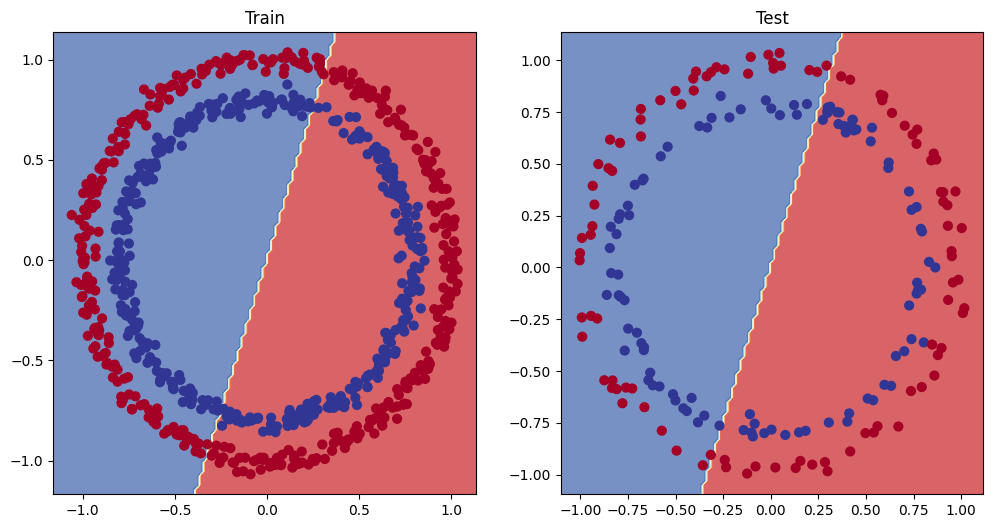

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try add improve our model by:
* Adding modre hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1
  


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='cuda:0')

In [ ]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the targer device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, t_test = X_test.to(device), y_train.to(device)

# Build training and evaluate loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # Print our what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, acc: {acc:2f}% | Test loss: {test_loss:5f}, test acc: {test_acc:2f}%")


Epoch: 0 | Loss: 0.693955, acc: 50.875000% | Test loss: 0.692615, test acc: 51.000000%
Epoch: 100 | Loss: 0.693048, acc: 50.375000% | Test loss: 0.693790, test acc: 48.000000%
Epoch: 200 | Loss: 0.692986, acc: 51.125000% | Test loss: 0.694373, test acc: 46.000000%
Epoch: 300 | Loss: 0.692980, acc: 51.625000% | Test loss: 0.694577, test acc: 45.000000%
Epoch: 400 | Loss: 0.692980, acc: 51.125000% | Test loss: 0.694645, test acc: 46.000000%
Epoch: 500 | Loss: 0.692980, acc: 51.000000% | Test loss: 0.694668, test acc: 46.000000%
Epoch: 600 | Loss: 0.692980, acc: 51.000000% | Test loss: 0.694676, test acc: 46.000000%
Epoch: 700 | Loss: 0.692980, acc: 51.000000% | Test loss: 0.694678, test acc: 46.000000%
Epoch: 800 | Loss: 0.692980, acc: 51.000000% | Test loss: 0.694679, test acc: 46.000000%
Epoch: 900 | Loss: 0.692980, acc: 51.000000% | Test loss: 0.694679, test acc: 46.000000%


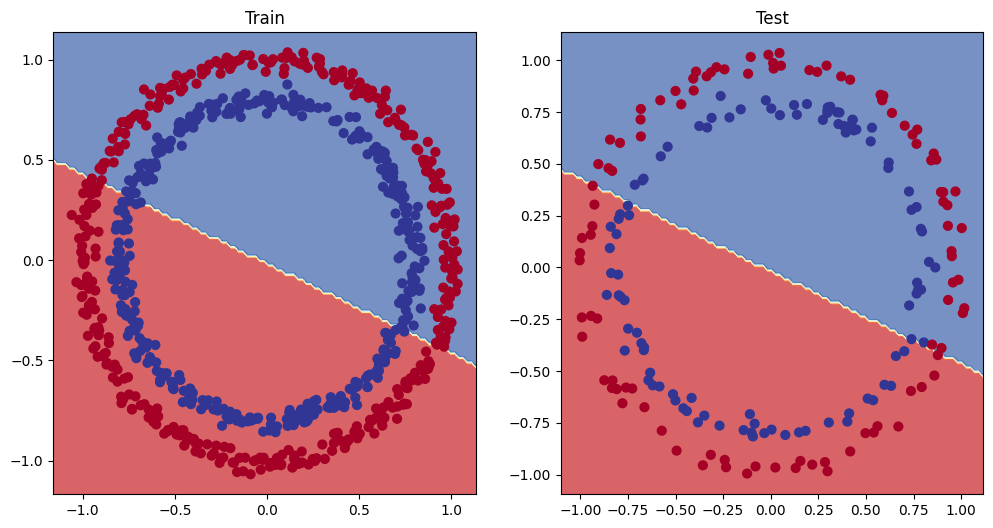

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.


In [ ]:
 # Create some data (same as notebook 01)
 weight = 0.7
 bias = 0.3
 start = 0
 end = 1
 step = 0.01

 # create data
 X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
 y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

 # Check the data
 print(len(X_regression))
 X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

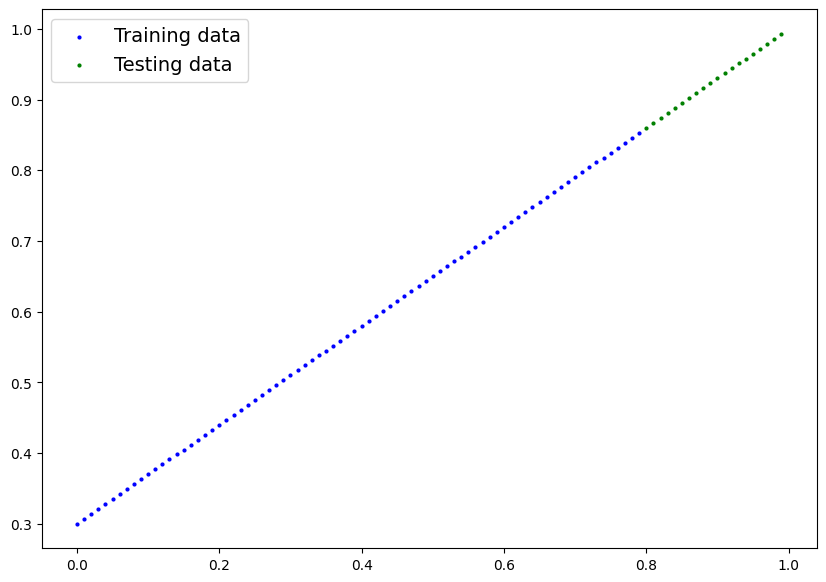

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `nodel_1` to fit a straight line


In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss wtth regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training loop
for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | Loss: {loss:5f} | Test loss: {test_loss:5f}")

Epochs: 0 | Loss: 0.759859 | Test loss: 0.911029
Epochs: 100 | Loss: 0.028580 | Test loss: 0.000813
Epochs: 200 | Loss: 0.025325 | Test loss: 0.002092
Epochs: 300 | Loss: 0.021375 | Test loss: 0.003051
Epochs: 400 | Loss: 0.019645 | Test loss: 0.003408
Epochs: 500 | Loss: 0.019402 | Test loss: 0.003873
Epochs: 600 | Loss: 0.019032 | Test loss: 0.003789
Epochs: 700 | Loss: 0.018783 | Test loss: 0.003813
Epochs: 800 | Loss: 0.018397 | Test loss: 0.003288
Epochs: 900 | Loss: 0.017980 | Test loss: 0.003604


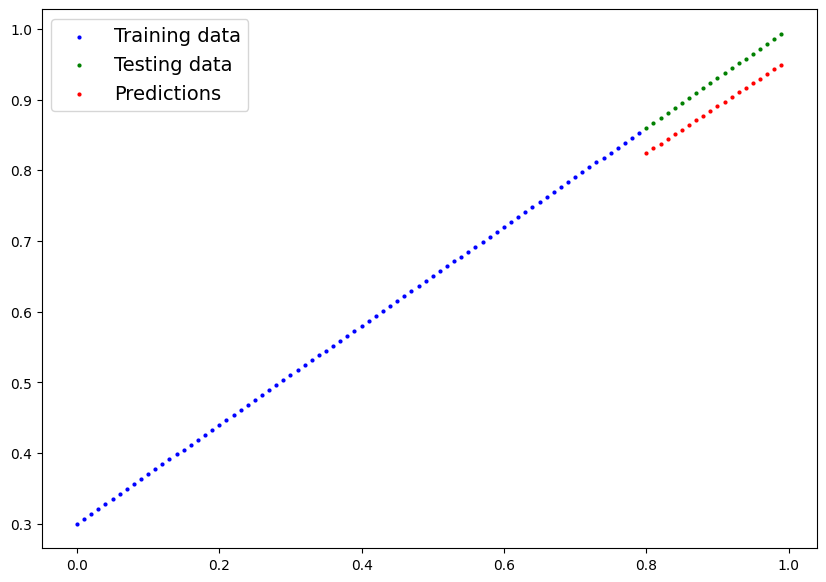

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

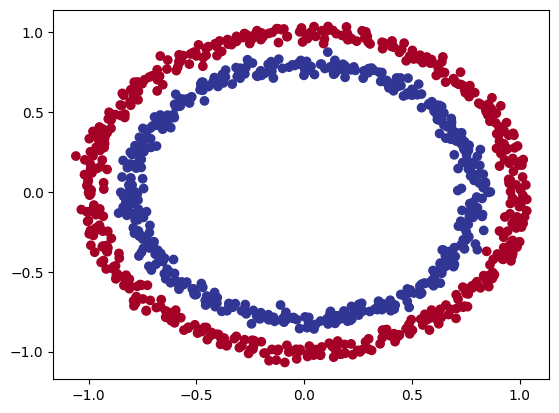

In [ ]:
# Make and plot data 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural nerworks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [ ]:
 # Build a mosel with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we puy our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_3.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loos backward (backpropagation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, acc: {acc:2f}% | Test loss: {test_loss:5f}, acc: {test_acc:2f}%")

Epoch: 0 | Loss: 0.692946, acc: 50.000000% | Test loss: 0.693188, acc: 50.000000%
Epoch: 100 | Loss: 0.691153, acc: 52.875000% | Test loss: 0.691024, acc: 52.500000%
Epoch: 200 | Loss: 0.689774, acc: 53.375000% | Test loss: 0.689396, acc: 55.000000%
Epoch: 300 | Loss: 0.687949, acc: 53.000000% | Test loss: 0.687232, acc: 56.000000%
Epoch: 400 | Loss: 0.685168, acc: 52.750000% | Test loss: 0.684115, acc: 56.500000%
Epoch: 500 | Loss: 0.681022, acc: 52.750000% | Test loss: 0.679412, acc: 56.500000%
Epoch: 600 | Loss: 0.675149, acc: 54.500000% | Test loss: 0.672851, acc: 56.000000%
Epoch: 700 | Loss: 0.666589, acc: 58.375000% | Test loss: 0.663216, acc: 59.000000%
Epoch: 800 | Loss: 0.651596, acc: 64.000000% | Test loss: 0.647569, acc: 67.500000%
Epoch: 900 | Loss: 0.623623, acc: 74.000000% | Test loss: 0.621453, acc: 79.000000%


In [ ]:
# Makes prediction
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

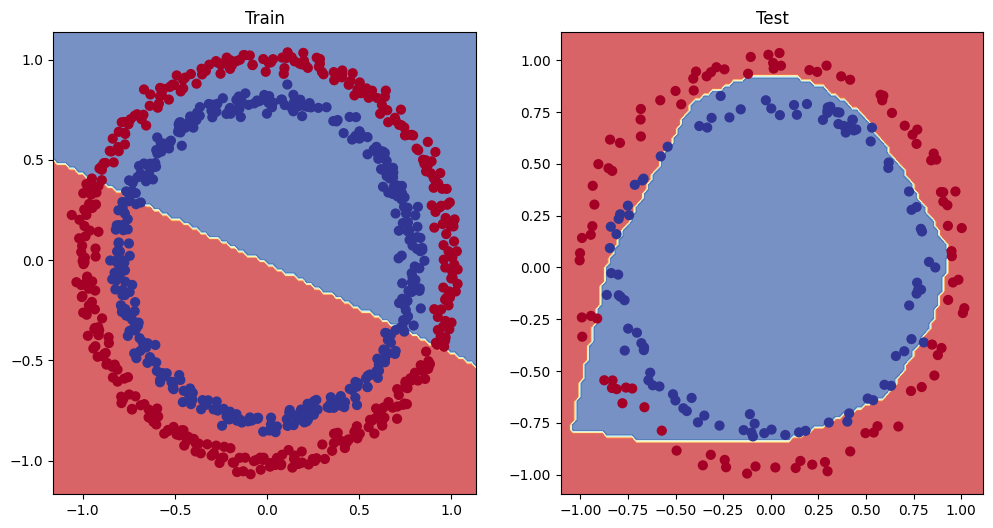

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

**Answer:** Of corse, we can fit our model longer, example 2000 epochs, and get 99.5% accuracy on the test data

## 7. Replicating non-linear activation functions

Neural nerworks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.


In [ ]:
# Create tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32) # step = 1 - it's integer numbers, step = 1.0 - it's default torch.float32
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

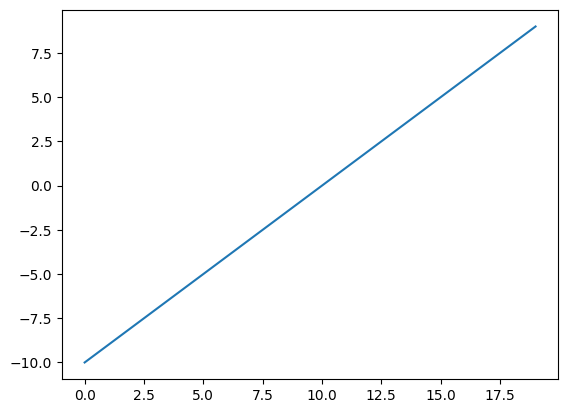

In [ ]:
# Visualize the tensor
plt.plot(A)

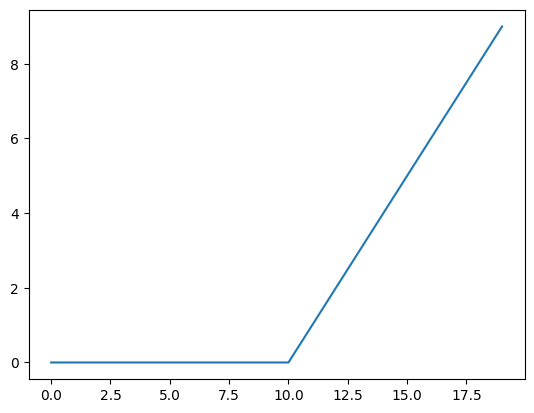

In [ ]:
# Plot relu function
plt.plot(torch.relu(A))

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

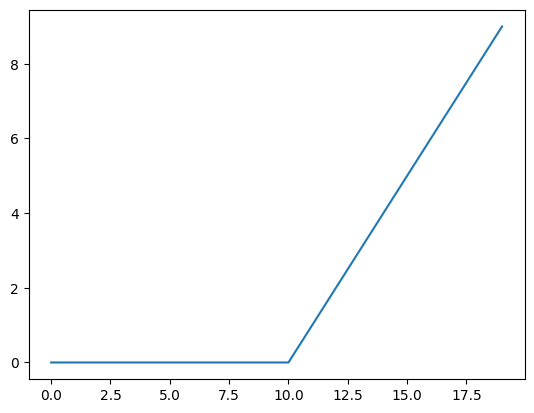

In [ ]:
# Plot ReLU custom activation function
plt.plot(relu(A))

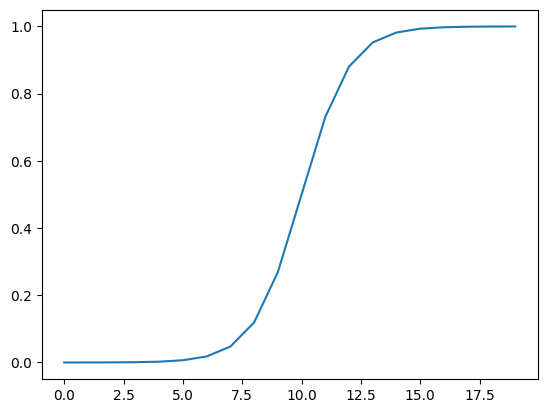

In [ ]:
# Now let's do the same for Sigmoid = https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A))

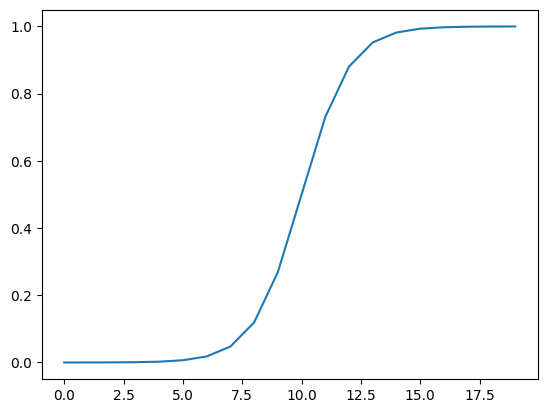

In [ ]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud vs. not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

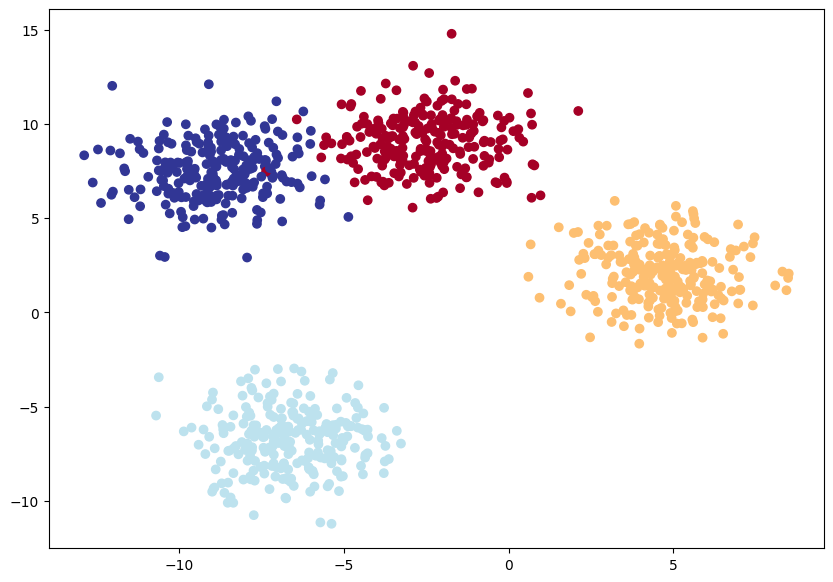

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and senf it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
 # Create a loss function for multi-class classification - loss function measures how wrong our model's predictions
 loss_fn = nn.CrossEntropyLoss()

 # Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
 optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.1) # learning rate is a hyperparamter you can change

### 8.4 Getting prediction probabilities for multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert out model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw outputs of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:5]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
 # Fit the multi-class model to the data
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 # Set number of epochs
 epochs = 100

 # Put data to the target device
 X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
 X_blob_test, y_blob_test, = X_blob_test.to(device), y_blob_test.to(device)
 
# Loop through data
for epoch in range(epochs):
  ### training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
    
  # Print out what's happenin
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:4f}, acc: {acc:2f}% | Test loss: {test_loss:4f}, test acc: {test_acc:2f}%")



Epoch: 0 | Loss: 1.043237, acc: 65.500000% | Test loss: 0.578615, test acc: 95.500000%
Epoch: 10 | Loss: 0.143978, acc: 99.125000% | Test loss: 0.130374, test acc: 99.000000%
Epoch: 20 | Loss: 0.080617, acc: 99.125000% | Test loss: 0.072161, test acc: 99.500000%
Epoch: 30 | Loss: 0.059236, acc: 99.125000% | Test loss: 0.051333, test acc: 99.500000%
Epoch: 40 | Loss: 0.048919, acc: 99.000000% | Test loss: 0.040981, test acc: 99.500000%
Epoch: 50 | Loss: 0.042950, acc: 99.000000% | Test loss: 0.034861, test acc: 99.500000%
Epoch: 60 | Loss: 0.039099, acc: 99.000000% | Test loss: 0.030834, test acc: 99.500000%
Epoch: 70 | Loss: 0.036429, acc: 99.000000% | Test loss: 0.027988, test acc: 99.500000%
Epoch: 80 | Loss: 0.034480, acc: 99.000000% | Test loss: 0.025871, test acc: 99.500000%
Epoch: 90 | Loss: 0.033003, acc: 99.125000% | Test loss: 0.024232, test acc: 99.500000%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

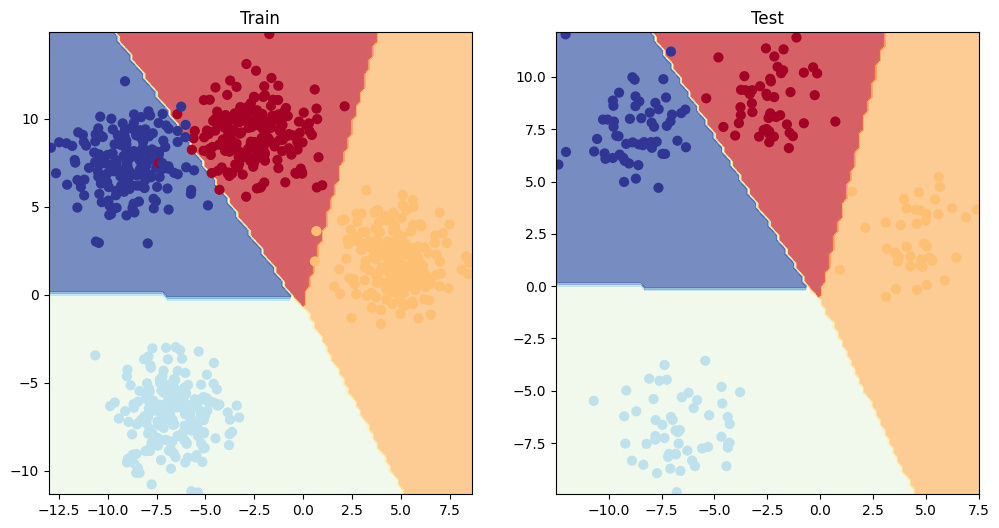

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/stable/pages/quickstart.html

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 9.1 MB/s eta 0:00:00


In [ ]:
y_blob_test.device, y_preds.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

# Exercises & Extra-curriculum

## 1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# Setup agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Create binary classification dataset
X, y = make_moons(n_samples=1000,
                  random_state=42)

X.shape, y.shape, X[:5], y[:5]

((1000, 2),
 (1000,),
 array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        [ 0.46587532, -0.34540571],
        [-0.85041204,  0.52611726]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Turn data into PyTorch tensors
X, y = torch.from_numpy(X).type(torch.float32), torch.from_numpy(y).type(torch.float32)
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

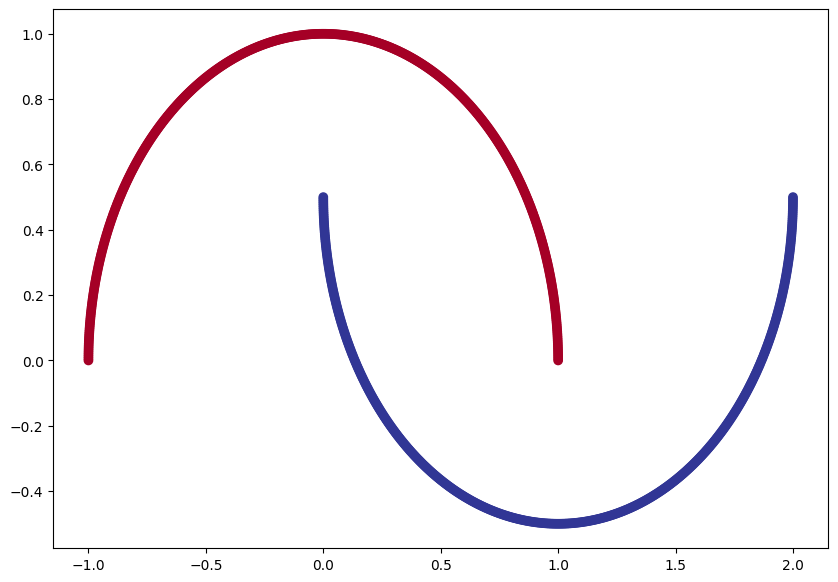

In [ ]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
# Build a subclass nn.Module
class MoonModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    """ Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:

    """
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_moon = MoonModelV0(input_features=2,
                         output_features=1,
                         hidden_units=8).to(device)

model_moon

MoonModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_moon.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# Use torchmetrics for accuracy
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="binary", num_classes=2).to(device)

In [ ]:
# Setup reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup epochs
epochs = 700

# Put the data in target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Put model to the target device
model_moon.to(device)

# Loop throught the data
for epoch in range(epochs):
  ### Training
  model_moon.train() # Turn model in train mode

  y_logits = model_moon(X_train).squeeze() # Get model outputs (logits)
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits in prediction labels

  loss = loss_fn(y_logits, y_train) # Calculate the loss
  acc = torchmetric_accuracy(y_pred, y_train) # Calculate accuracy
  
  optimizer.zero_grad()
  loss.backward() # Backpropagation
  optimizer.step()

  ### Testing
  model_moon.eval() # Turn model in test mode
  with torch.inference_mode():
    test_logits = model_moon(X_test).squeeze() # Get output model test logits
    test_pred = torch.round(torch.sigmoid(test_logits)) 

    test_loss = loss_fn(test_logits, y_test) # Calculate the loss
    test_acc = torchmetric_accuracy(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:4f}, acc: {acc:2f}% | Test loss: {test_loss:4f}, test acc: {test_acc:2f}%")    

Epoch: 0 | Loss: 0.711963, acc: 0.500000% | Test loss: 0.705626, test acc: 0.500000%
Epoch: 10 | Loss: 0.690148, acc: 0.615000% | Test loss: 0.688046, test acc: 0.635000%
Epoch: 20 | Loss: 0.679086, acc: 0.800000% | Test loss: 0.678650, test acc: 0.835000%
Epoch: 30 | Loss: 0.666147, acc: 0.837500% | Test loss: 0.666749, test acc: 0.840000%
Epoch: 40 | Loss: 0.646575, acc: 0.817500% | Test loss: 0.648251, test acc: 0.825000%
Epoch: 50 | Loss: 0.616957, acc: 0.811250% | Test loss: 0.620223, test acc: 0.825000%
Epoch: 60 | Loss: 0.574813, acc: 0.811250% | Test loss: 0.580248, test acc: 0.825000%
Epoch: 70 | Loss: 0.519990, acc: 0.815000% | Test loss: 0.528297, test acc: 0.830000%
Epoch: 80 | Loss: 0.459348, acc: 0.827500% | Test loss: 0.470576, test acc: 0.820000%
Epoch: 90 | Loss: 0.403497, acc: 0.838750% | Test loss: 0.416930, test acc: 0.815000%
Epoch: 100 | Loss: 0.360007, acc: 0.845000% | Test loss: 0.374411, test acc: 0.830000%
Epoch: 110 | Loss: 0.328499, acc: 0.852500% | Test los

## 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [ ]:
# Make prediction with model
model_moon.to(device)

model_moon.eval()
with torch.inference_mode():
  y_logits = model_moon(X_test).squeeze()

y_preds = torch.round(torch.sigmoid(y_logits))

print(f"Prediction labels model moon: {y_preds[:10]}")
print(f"True dataset label: {y_test[:10]}")

Prediction labels model moon: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')
True dataset label: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


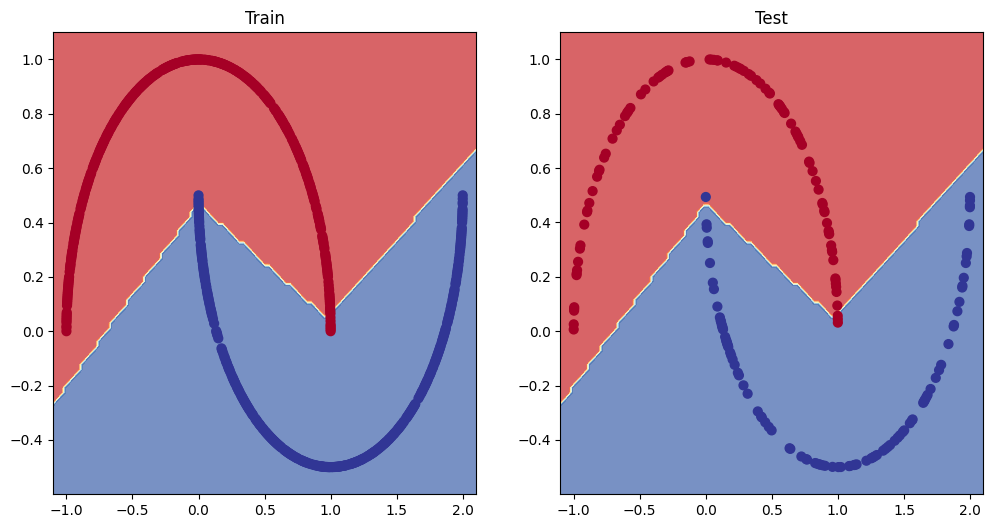

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_moon, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_moon, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

* Feel free to reference the ML cheatsheet website for the formula.

In [ ]:
# Create simple tensor
a = torch.arange(-10, 10, 1, dtype=torch.float)
a

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

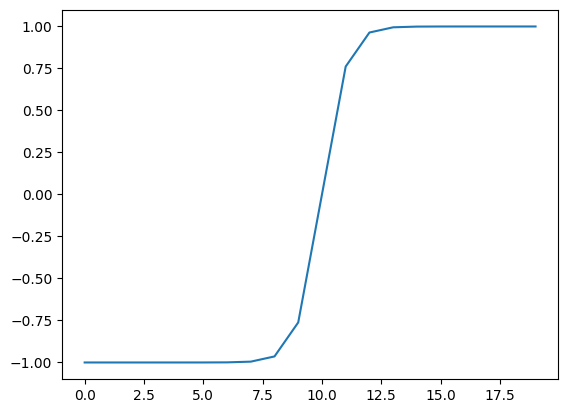

In [ ]:
# Replicate the Tanh in pure PyTorch
def tanh(x: torch.Tensor):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(a), )

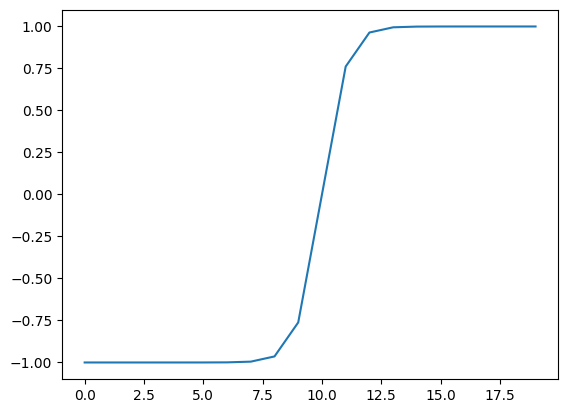

In [ ]:
plt.plot(torch.tanh(a))

## 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

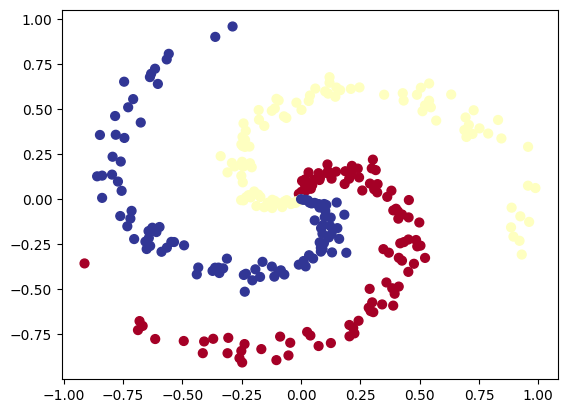

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [ ]:
X_train.shape

torch.Size([240, 2])

### Build model

In [ ]:
# Create model by subclassing nn.Module
class SpiralsModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_spir = SpiralsModelV0(input_features=2,
                            output_features=3,
                            hidden_units=8).to(device)

model_spir

SpiralsModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [ ]:
# Make predictions with model_spir
# Put data in to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

model_spir.eval()
with torch.inference_mode():
  y_logits = model_spir(X_test)

print(f"Logits:\n {y_logits[:10]}")

# Pred probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(f"y_pred_probs:\n {y_pred_probs[:10]}")

# Pred labels
y_pred = torch.argmax(y_pred_probs, dim=1)
print(f"y_pred_probs:\n {y_pred[:10]}")
print(f"y_test: \n {y_test[:10]}")

Logits:
 tensor([[-0.0735, -0.3833, -0.2461],
        [-0.0482, -0.3128, -0.1877],
        [-0.0857, -0.4008, -0.2817],
        [-0.0763, -0.3905, -0.2552],
        [-0.0625, -0.3516, -0.2157],
        [-0.0722, -0.3579, -0.2328],
        [-0.1935, -0.3702, -0.4132],
        [-0.0637, -0.3682, -0.2339],
        [-0.0735, -0.3853, -0.2501],
        [-0.1550, -0.4070, -0.3768]], device='cuda:0')
y_pred_probs:
 tensor([[0.3883, 0.2849, 0.3268],
        [0.3792, 0.2910, 0.3298],
        [0.3919, 0.2860, 0.3221],
        [0.3896, 0.2846, 0.3258],
        [0.3836, 0.2873, 0.3291],
        [0.3842, 0.2887, 0.3272],
        [0.3787, 0.3173, 0.3040],
        [0.3874, 0.2857, 0.3268],
        [0.3891, 0.2848, 0.3261],
        [0.3878, 0.3014, 0.3107]], device='cuda:0')
y_pred_probs:
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
y_test: 
 tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1], device='cuda:0')


### Loss function and optimizer

In [ ]:
# setup Loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer
optimizer = torch.optim.Adam(params=model_spir.parameters(),
                             lr=0.15)

### Training and testing loop

In [ ]:
# Repoducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup epochs
epochs = 250

# Put data in to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Put model in the target device
model_spir.to(device)

# Loop through data
for epoch in range(epochs):
  ### Train mode
  model_spir.train()

  y_logits = model_spir(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_spir.eval()
  with torch.inference_mode():
    test_logits = model_spir(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:4f}, acc: {acc:2f}% | Test loss: {test_loss:4f}, test acc: {test_acc:2f}%")

Epoch: 0 | Loss: 1.103042, acc: 32.500000% | Test loss: 1.080008, test acc: 43.333333%
Epoch: 10 | Loss: 0.752870, acc: 70.000000% | Test loss: 0.685901, test acc: 71.666667%
Epoch: 20 | Loss: 0.438777, acc: 81.666667% | Test loss: 0.465407, test acc: 80.000000%
Epoch: 30 | Loss: 0.310519, acc: 87.083333% | Test loss: 0.344268, test acc: 86.666667%
Epoch: 40 | Loss: 0.269879, acc: 88.333333% | Test loss: 0.295674, test acc: 86.666667%
Epoch: 50 | Loss: 0.424264, acc: 84.583333% | Test loss: 0.690714, test acc: 75.000000%
Epoch: 60 | Loss: 0.339958, acc: 84.166667% | Test loss: 0.297372, test acc: 85.000000%
Epoch: 70 | Loss: 0.231269, acc: 84.583333% | Test loss: 0.303394, test acc: 86.666667%
Epoch: 80 | Loss: 0.172051, acc: 92.083333% | Test loss: 0.206024, test acc: 93.333333%
Epoch: 90 | Loss: 0.138378, acc: 93.750000% | Test loss: 0.200430, test acc: 93.333333%
Epoch: 100 | Loss: 0.122522, acc: 95.000000% | Test loss: 0.183439, test acc: 93.333333%
Epoch: 110 | Loss: 0.111564, acc

In [ ]:
y_logits[:10], y_train[:10]

(tensor([[ 1.2052e+01, -4.0720e+01,  3.4470e+01],
         [ 4.9163e+00, -3.0060e+01, -2.8364e+01],
         [ 9.3570e-01, -1.9777e+00,  3.9613e-02],
         [-8.9661e+00,  2.8692e+01, -1.0234e+02],
         [-5.6813e+00,  2.0390e+01, -7.8493e+01],
         [ 4.9343e+00, -4.1813e+00, -8.3260e+00],
         [ 2.4920e+00, -2.2445e+00, -1.8935e+00],
         [ 3.8157e+00, -2.3433e+01,  9.7589e+00],
         [ 3.3023e+00, -2.0034e+01, -3.6474e+01],
         [-9.9831e+00,  3.3475e+01, -1.1648e+02]], device='cuda:0',
        grad_fn=<SliceBackward0>),
 tensor([2, 0, 0, 1, 1, 0, 0, 2, 0, 1], device='cuda:0'))

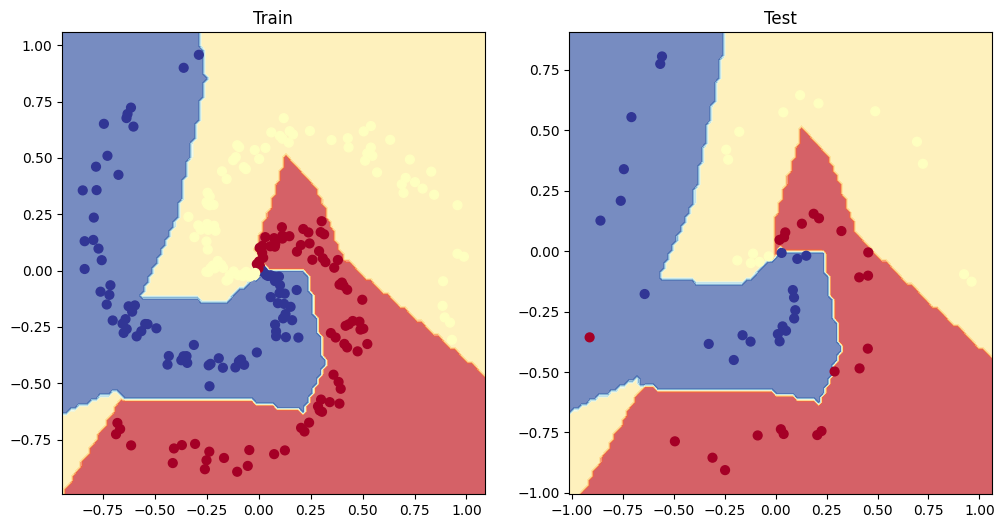

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_spir, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_spir, X_test, y_test)